In [23]:
#Importation de bibliothèque
import pandas as pd
import numpy as np
! pip install pandas_datareader
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
! pip install yfinance
import yfinance as yahooFinance
%matplotlib inline

In [24]:
GetYiliInformation = yahooFinance.Ticker("600887.SS")
 
# Let us  get historical stock prices for Facebook
# covering the past few years.
# max->maximum number of daily prices available
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
Yili = GetYiliInformation.history(period="5y")
Yili.to_csv('Yili_Stock.csv')

GetMengnuiInformation = yahooFinance.Ticker("2319.HK")
 
# Let us  get historical stock prices for Facebook
# covering the past few years.
# max->maximum number of daily prices available
# for Facebook.
# Valid options are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y,
# 5y, 10y and ytd.
Mengnui = GetMengnuiInformation.history(period="5y")
Mengnui.to_csv('Mengnui_Stock.csv')

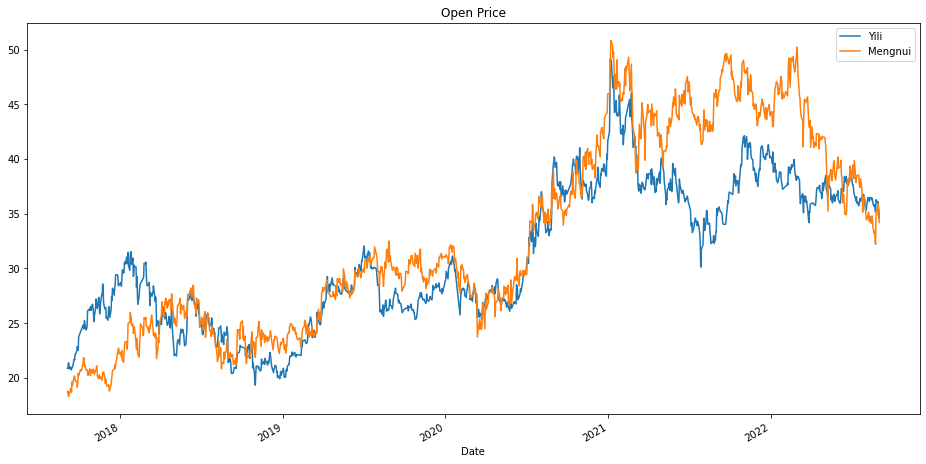

In [25]:
# Graphique des ouvertures
Yili['Open'].plot(label='Yili',figsize=(16,8),title='Open Price')
Mengnui['Open'].plot(label='Mengnui',figsize=(16,8),title='Open Price')
plt.legend()

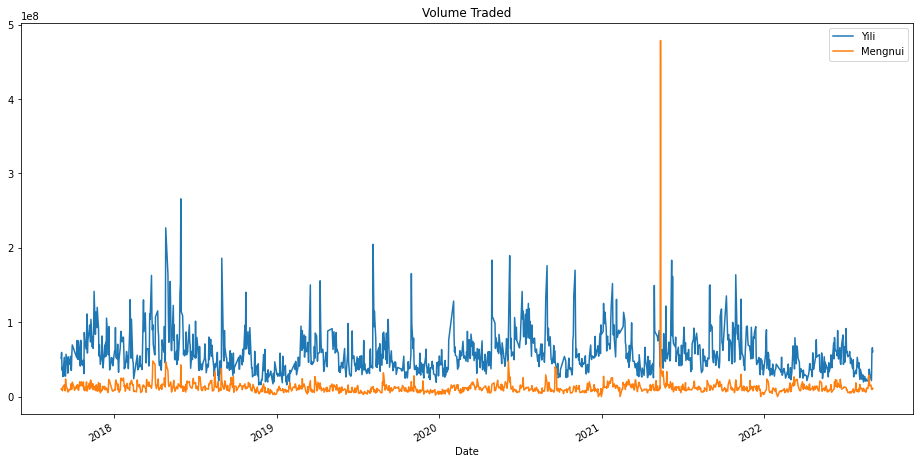

In [26]:
# Graphique des volumes
Yili['Volume'].plot(label='Yili',figsize=(16,8),title='Volume Traded')
Mengnui['Volume'].plot(label='Mengnui')

plt.legend()

In [28]:
#Analyse le pic de xiaomi fin 2020
Mengnui['Volume'].idxmax()

Timestamp('2021-05-13 00:00:00')

In [32]:
Mengnui

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded
Date,,,,,,,,
2017-09-04,18.674253,18.943779,18.385477,18.674253,10140132,0.0,0,1.893594e+08
2017-09-05,18.770515,18.770515,18.327724,18.520241,10989928,0.0,0,2.062866e+08
2017-09-06,18.289221,18.597250,17.923437,18.154459,8967157,0.0,0,1.640023e+08
2017-09-07,18.423981,18.655003,18.250715,18.366226,7910911,0.0,0,1.457505e+08
2017-09-08,18.481738,19.155551,18.423982,18.751263,13360519,0.0,0,2.469256e+08
...,...,...,...,...,...,...,...,...
2022-08-29,35.349998,36.349998,35.299999,36.049999,15566802,0.0,0,5.502864e+08
2022-08-30,35.950001,35.950001,34.849998,35.450001,10464979,0.0,0,3.762160e+08
2022-08-31,34.849998,36.049999,34.599998,35.650002,9583747,0.0,0,3.339936e+08


In [33]:
# Création nouvelles données du volume total en valeurs boursières
Yili['Total Traded'] = Yili['Open']*Yili['Volume']
Mengnui['Total Traded'] = Mengnui['Open']*Mengnui['Volume']


Text(0, 0.5, 'Total Traded')

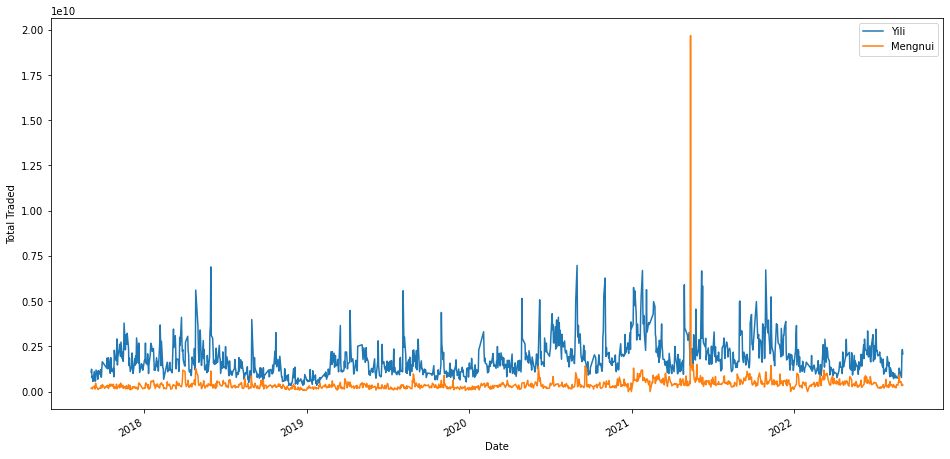

In [34]:
# Graphique du volume total des valeurs boursières
Yili['Total Traded'].plot(label='Yili',figsize=(16,8))
Mengnui['Total Traded'].plot(label='Mengnui')

plt.legend()
plt.ylabel('Total Traded')

<AxesSubplot:title={'center':'Mengnui MA - Moving Averages'}, xlabel='Date'>

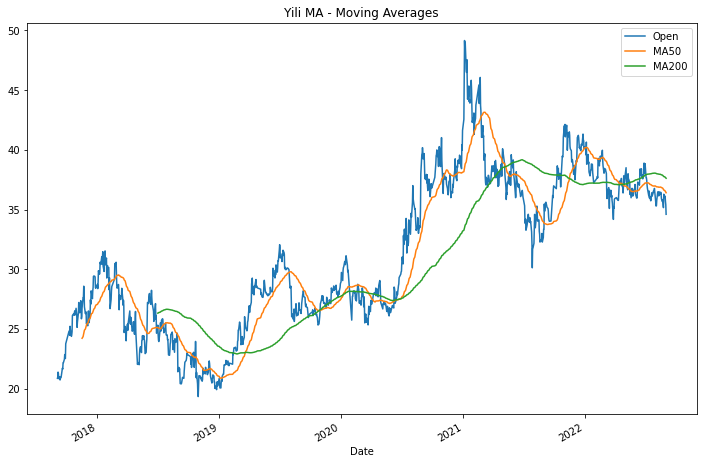

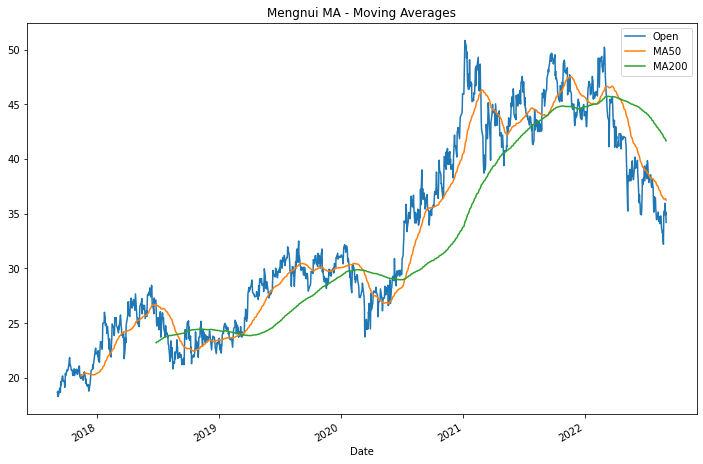

In [39]:
# Création d'un graphique des moyennes mobiles(MA - Moving Averages)
Yili['MA50']=Yili['Open'].rolling(50).mean()
Yili['MA200']=Yili['Open'].rolling(200).mean()
Mengnui['MA50']=Mengnui['Open'].rolling(50).mean()
Mengnui['MA200']=Mengnui['Open'].rolling(200).mean()

Yili[['Open','MA50','MA200']].plot(figsize=(12,8),label=('Yili'), title='Yili MA - Moving Averages')
Mengnui[['Open','MA50','MA200']].plot(figsize=(12,8),label=('Mengnui'), title='Mengnui MA - Moving Averages')

In [46]:
# analyse des relations par diagramme dispersions des prix
# importation package 
from pandas.plotting import scatter_matrix

In [47]:
# Création d'une concaténation de toutes les actions
ac_comp = pd.concat([Yili['Open'],Mengnui['Open']],axis=1)
ac_comp.columns = ['Yili Open','Mengnui Open']

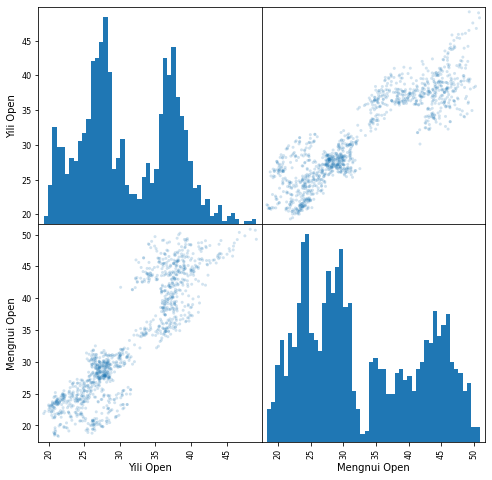

In [48]:
# Vous pouvez utiliser un point-virgule pour supprimer l'impression des axes
scatter_matrix(ac_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

In [51]:
# Calcul r_t (rendement à l'instant t) comme étant égal au prix à l'instant t divisé par le prix à l'instant t-1 (la veille) moins 1.
# pourcentage de gain (ou de perte) si vous avez acheté l'action le jour et l'avez ensuite vendue le lendemain "Pour la volatilité"
# Méthode 1: en utilisant shift
Yili['returns'] = (Yili['Close'] / Yili['Close'].shift(1) ) - 1
# méthode 2: en utilisant pct_change
Yili['returns'] = Yili['Close'].pct_change(1)
Mengnui['returns'] = Mengnui['Close'].pct_change(1)

Yili

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,,
2017-09-04,20.876891,21.054190,20.504564,20.823702,51415610,0.0,0,1.073398e+09,NaN,NaN,NaN
2017-09-05,20.850300,21.355600,20.841434,21.337870,59348150,0.0,0,1.237427e+09,NaN,NaN,0.024691
2017-09-06,21.382196,21.470844,21.116247,21.275816,35595350,0.0,0,7.611067e+08,NaN,NaN,-0.002908
2017-09-07,21.275816,21.275816,20.788246,20.797110,39074778,0.0,0,8.313478e+08,NaN,NaN,-0.022500
2017-09-08,20.841434,21.009868,20.708461,20.992138,26944660,0.0,0,5.615654e+08,NaN,NaN,0.009378
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,36.020000,36.240002,35.900002,35.950001,23766533,0.0,0,8.560705e+08,36.5892,37.737449,-0.006632
2022-08-30,36.119999,36.279999,35.709999,36.130001,21575519,0.0,0,7.793077e+08,36.5554,37.710722,0.005007
2022-08-31,35.689999,36.000000,35.020000,35.740002,59101195,0.0,0,2.109322e+09,36.5114,37.678873,-0.010794


<AxesSubplot:>

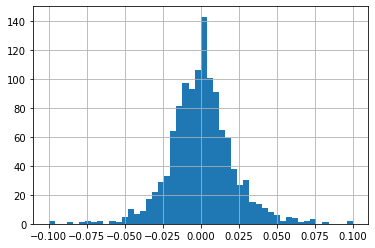

In [52]:

Yili['returns'].hist(bins=50)

<AxesSubplot:>

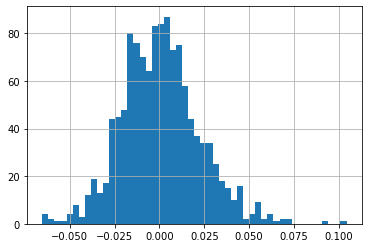

In [53]:

Mengnui['returns'].hist(bins=50)

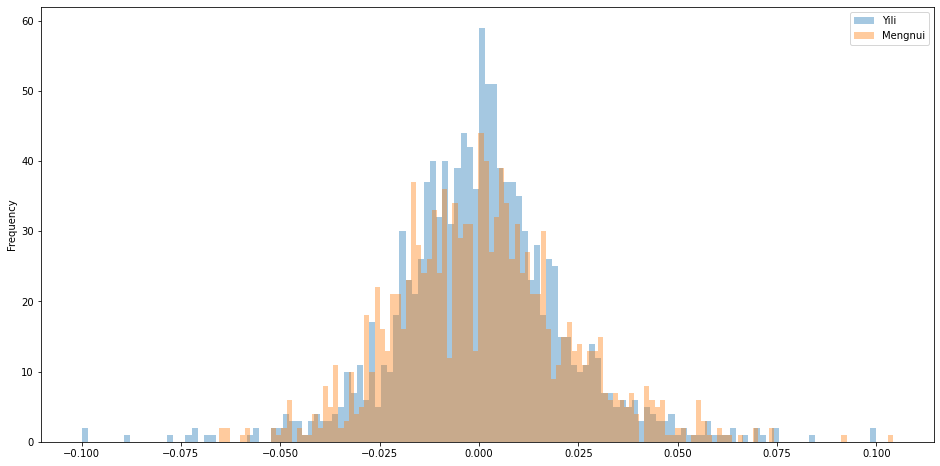

In [54]:
#Histogramme ensemble
# On rajoute .plot avant .hist pour supprimer les grilles
Yili['returns'].plot.hist(bins=130,label='Yili',figsize=(16,8),alpha=0.4)
Mengnui['returns'].plot.hist(bins=130,label='Mengnui',alpha=0.4)
plt.legend()

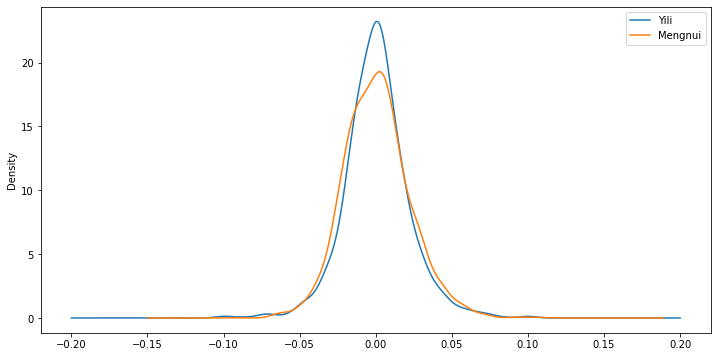

In [59]:
# Histogramme sous forme KDE (densité)
# ici on définit le graphique avec kind pour obtenir un graphique différent)
Yili['returns'].plot(kind='kde',label='Yili',figsize=(12,6))
Mengnui['returns'].plot(kind='kde',label='Mengnui') 
plt.legend()

<AxesSubplot:>

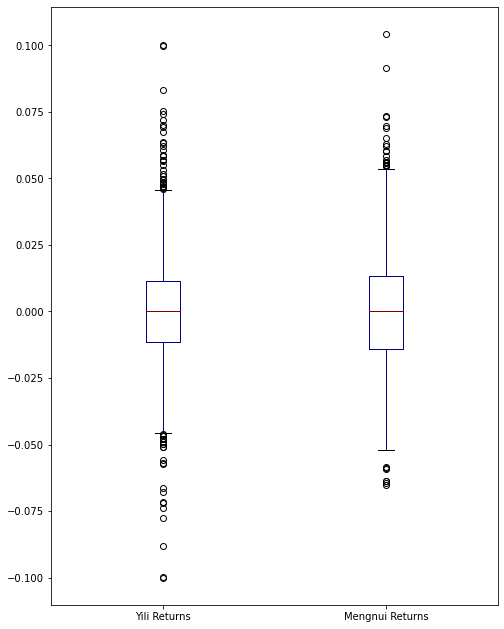

In [63]:
# Sous forme de box
box_df = pd.concat([Yili['returns'],Mengnui['returns']],axis=1)
box_df.columns = ['Yili Returns','Mengnui Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

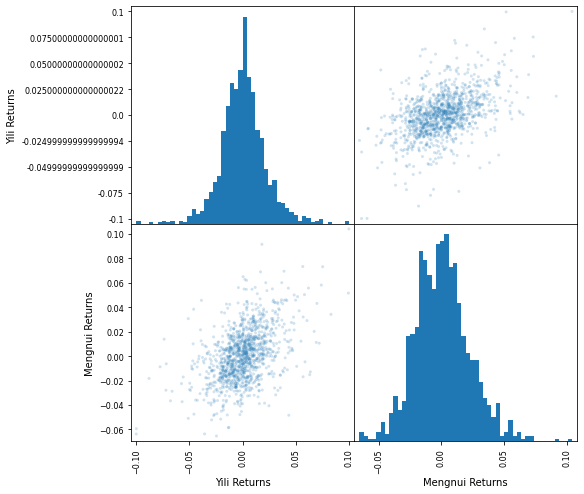

In [64]:
# On observe comment les entreprises sont-elles liées en comparaison avec l'industrie
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

<AxesSubplot:xlabel='Yili Returns', ylabel='Mengnui Returns'>

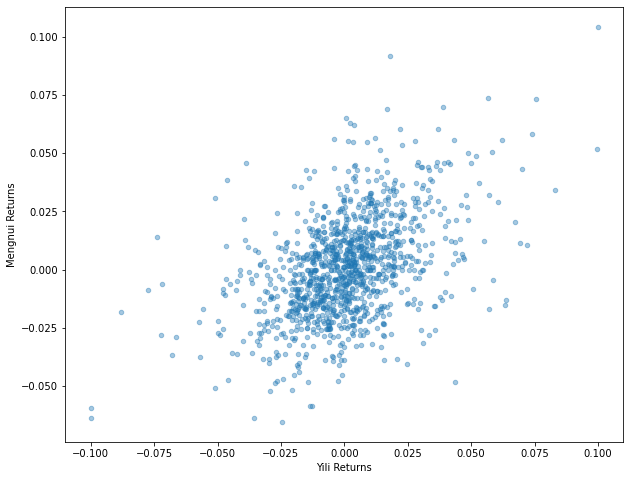

In [65]:
# tracons la relation entre Menngui et Yili
box_df.plot(kind='scatter',x='Yili Returns',y='Mengnui Returns',alpha=0.4,figsize=(10,8))

In [66]:
# Calcul rendement quotidien cumulatif
Yili['Cumulative Return'] = (1 + Yili['returns']).cumprod()
Mengnui['Cumulative Return'] = (1 + Mengnui['returns']).cumprod()

Yili

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,,
2017-09-04,20.876891,21.054190,20.504564,20.823702,51415610,0.0,0,1.073398e+09,NaN,NaN,NaN,NaN
2017-09-05,20.850300,21.355600,20.841434,21.337870,59348150,0.0,0,1.237427e+09,NaN,NaN,0.024691,1.024691
2017-09-06,21.382196,21.470844,21.116247,21.275816,35595350,0.0,0,7.611067e+08,NaN,NaN,-0.002908,1.021712
2017-09-07,21.275816,21.275816,20.788246,20.797110,39074778,0.0,0,8.313478e+08,NaN,NaN,-0.022500,0.998723
2017-09-08,20.841434,21.009868,20.708461,20.992138,26944660,0.0,0,5.615654e+08,NaN,NaN,0.009378,1.008089
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-29,36.020000,36.240002,35.900002,35.950001,23766533,0.0,0,8.560705e+08,36.5892,37.737449,-0.006632,1.726398
2022-08-30,36.119999,36.279999,35.709999,36.130001,21575519,0.0,0,7.793077e+08,36.5554,37.710722,0.005007,1.735042
2022-08-31,35.689999,36.000000,35.020000,35.740002,59101195,0.0,0,2.109322e+09,36.5114,37.678873,-0.010794,1.716314


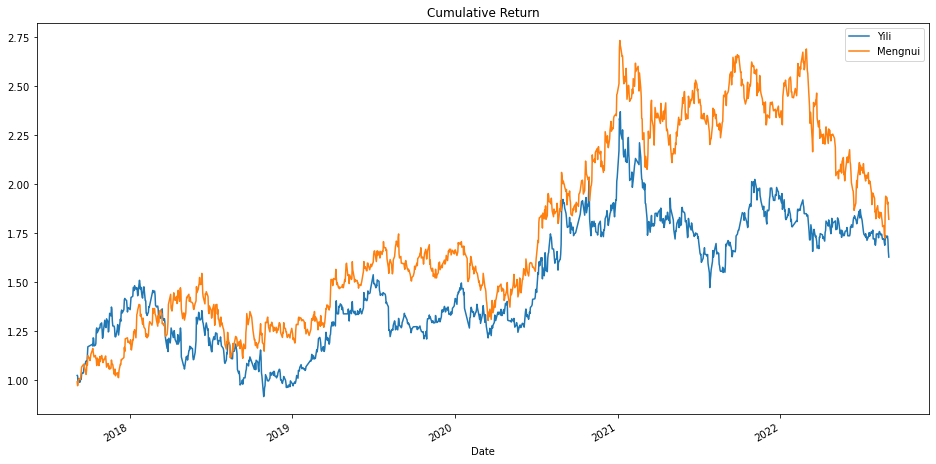

In [67]:
# Histogramme du rendement quotidien cumulatif
Yili['Cumulative Return'].plot(label='Yili',figsize=(16,8),title='Cumulative Return')
Mengnui['Cumulative Return'].plot(label='Mengnui')
plt.legend()

In [69]:
# Conclusion
# Les moyennes mobiles indiquent une santé plus stable pour le groupe Yili que Mengnui
# Entre 2021 et 22 Yii a eu plus de volume échangé sur ses 5 ans

# Yili GHroup ,à une plus grosse densité de volume échangé sur ses actions (+ de liquidités)
# Le 13 mai 2021 Danone se désengage de Mengnui
#La densité de rnedmeent quotidien est plus forte pour le groupe Yili autour de Zéro que le groupe Mengnui